In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN
     Country or Area  Year        Value  Value Footnotes
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN


5. How many rows and columns are in gdp_df? What are the data types of each column?

Answer: 7762 rows, data types = object, int64, float64, float64.

In [4]:
print(gdp_df.shape)
print(gdp_df.info())

(7662, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB
None


6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
#drop column 
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

#rename columns 
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})

print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2021     1517.016266
1  Afghanistan  2020     1968.341002
2  Afghanistan  2019     2079.921861
3  Afghanistan  2018     2060.698973
4  Afghanistan  2017     2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

Answer: 202 Countries have data for all 33 years, 40 countries are missing data, and the number of observations increase over the years then drop off after 2020.

In [6]:
#find year range
unique_years = gdp_df["Year"].unique()
print(unique_years) #1990 through 2022

#count number of years
print(len(unique_years)) #33 years

#count number of observations by country and rename column 
country_observations = gdp_df.groupby("Country")["Year"].count().reset_index(name="Observations")
#print(country_observations.head())

#find countries with 33 observations 
all_countries = country_observations[country_observations["Observations"] == 33] 
print(len(all_countries)) #202 countries 

#find countries with missing years
missing_countries = country_observations[country_observations["Observations"] < 33] 
print(len(missing_countries)) #40 countries with missing years
print(missing_countries.sort_values("Observations")) #list of countries

[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2022 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990]
33
202
40
                       Country  Observations
53                    Djibouti            10
197                    Somalia            10
225   Turks and Caicos Islands            12
192  Sint Maarten (Dutch part)            14
112                     Kosovo            15
36              Cayman Islands            16
154                      Nauru            19
0                  Afghanistan            20
47                    CuraÃ§ao            22
213    SÃ£o TomÃ© and Principe            22
169                      Palau            22
166         Other small states            23
180                      Qatar            23
219                Timor-Leste            23
124                    Liberia            23
125                      Libya            24
185                 San Marino            25
149        

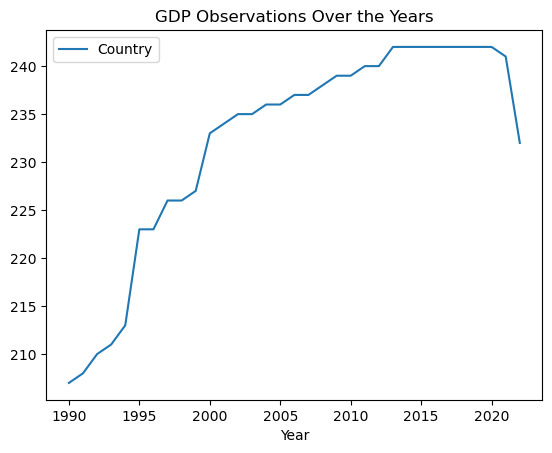

The number of observations seem to be generally consistent with some variations. However, there is a significant drop in the number of observations from 2021 to 2022.


In [7]:
#Look at the number of observations per year. What do you notice?

#group by year and count number countries to get yearly observations
yearly_obs = gdp_df.groupby("Year")["Country"].count()
yearly_obs = pd.DataFrame(yearly_obs) #switched to dataframe to sort
yearly_obs = yearly_obs.sort_values("Year", ascending=False)
#print(yearly_obs)

#line plot using seaborn 
sns.lineplot(data=yearly_obs)
plt.title("GDP Observations Over the Years")
plt.show()

print("The number of observations seem to be generally consistent with some variations. However, there is a significant drop in the number of observations from 2021 to 2022.")

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Answer: Histograms and density plots show distributions, while the violin plot and the box plot show summary and shape of the distributions.

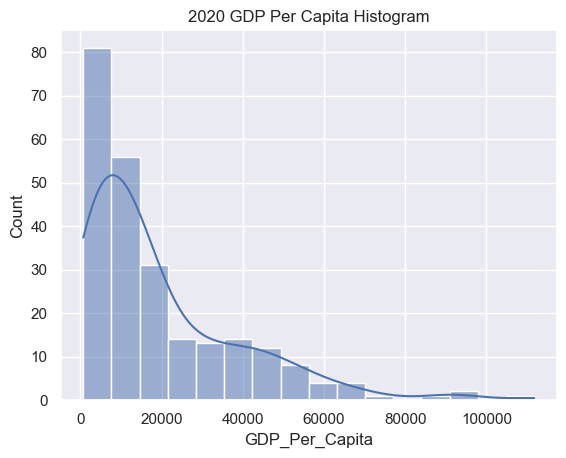

In [8]:
gdp_2020 = gdp_df[gdp_df["Year"]==2020] #subset year to 2020

sns.set(style="darkgrid")
sns.histplot(data=gdp_2020["GDP_Per_Capita"], kde=True)

#gdp_2020["GDP_Per_Capita"].hist(bins=5)

plt.title("2020 GDP Per Capita Histogram")

plt.show()

Text(0.5, 1.0, '2020 GDP Per Capita Density Chart')

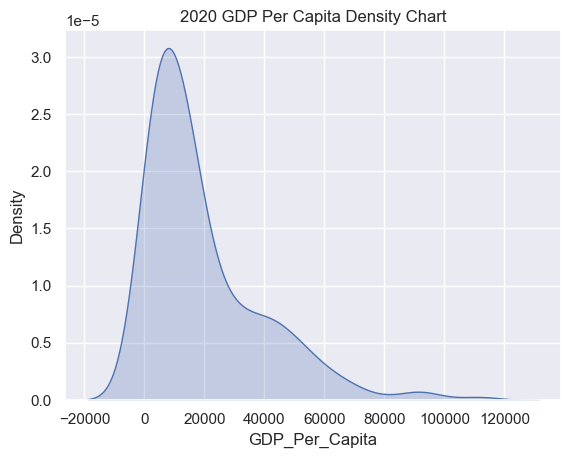

In [9]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title("2020 GDP Per Capita Density Chart")

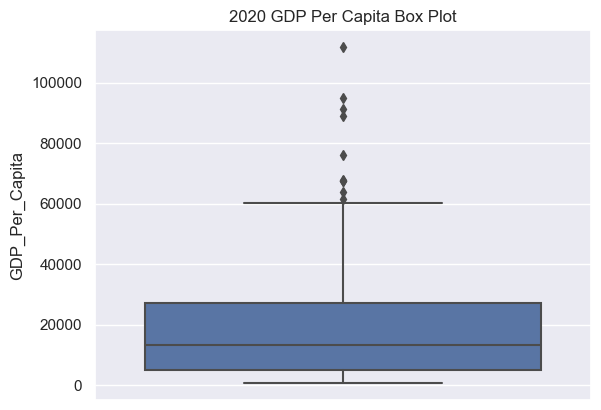

In [10]:
sns.boxplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("2020 GDP Per Capita Box Plot")
plt.show()

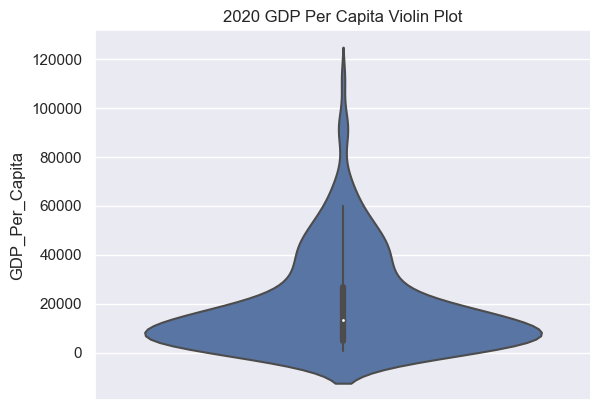

In [11]:
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("2020 GDP Per Capita Violin Plot")
plt.show()

9. What was the median GDP per capita value in 2020?

Answer: 13357.997573370474

In [12]:
print(gdp_2020["GDP_Per_Capita"].median())

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [13]:
#subset data
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])] #subset for specified years
print(gdp_decades.head())

                        Country  Year  GDP_Per_Capita
1                   Afghanistan  2020     1968.341002
11                  Afghanistan  2010     2026.163818
22  Africa Eastern and Southern  2020     3455.023119
32  Africa Eastern and Southern  2010     3513.315920
42  Africa Eastern and Southern  2000     2897.140841


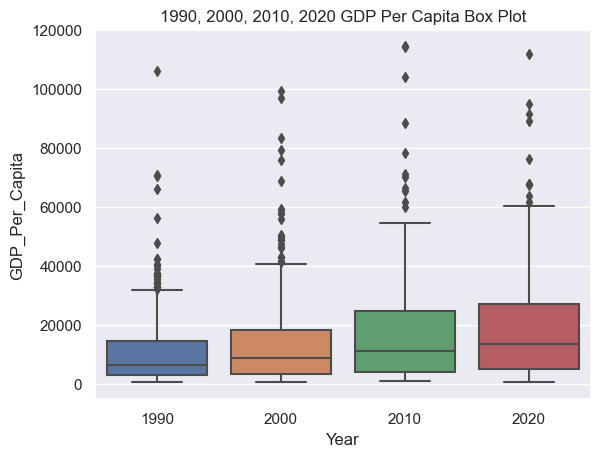

In [14]:
#boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Box Plot")
plt.show()

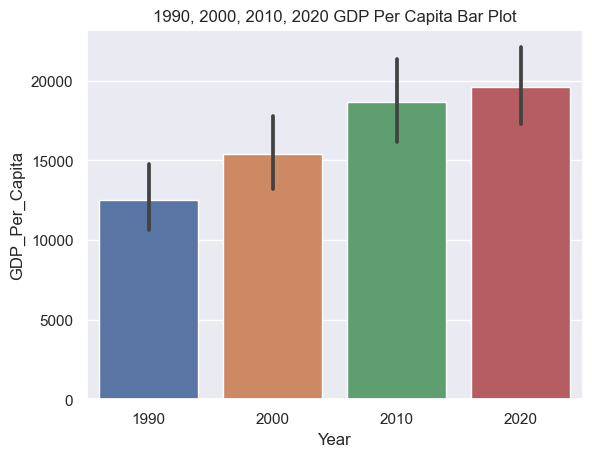

In [15]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Bar Plot")
plt.show()

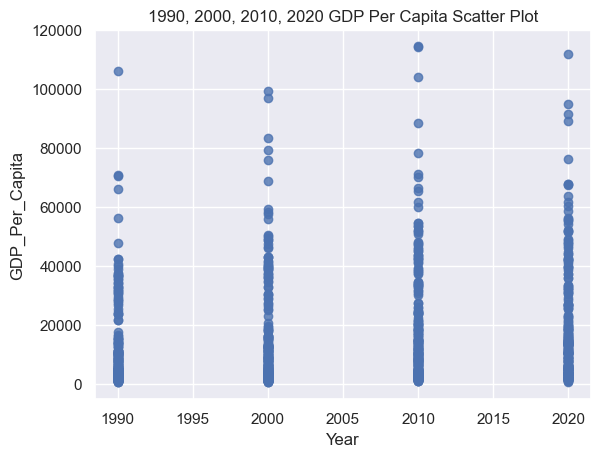

In [16]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Scatter Plot")
plt.show()

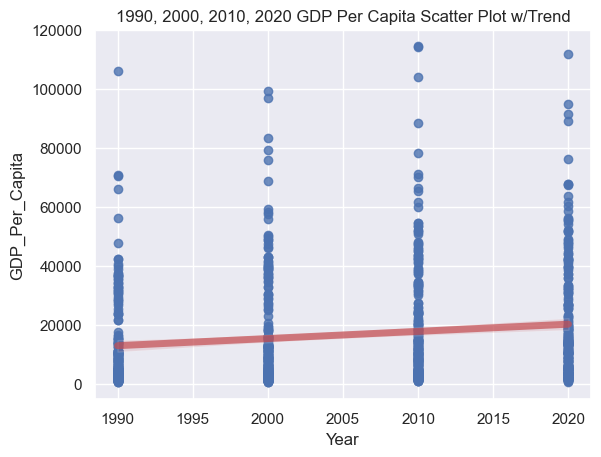

In [17]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Scatter Plot w/Trend")
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

Answer: United Arab Emirates

In [18]:
over_10k = gdp_df[gdp_df["GDP_Per_Capita"]>=100000].sort_values("Year")
print(over_10k.iloc[:1])

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Answer: Luxembourg

In [19]:
gdp_2020 = gdp_2020.sort_values("GDP_Per_Capita", ascending=False) #sort by descending 
print(gdp_2020.iloc[:1]) #Luxembourg 

         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751


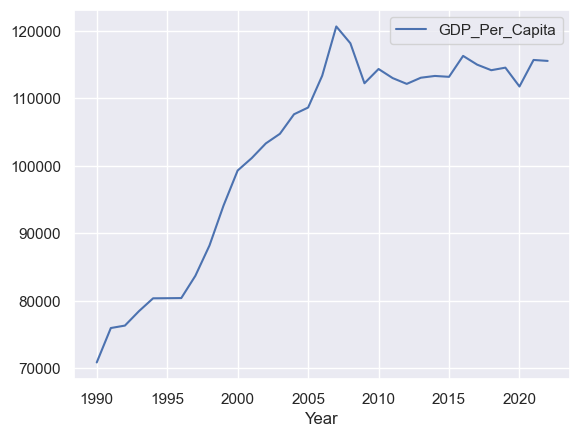

In [20]:
gdp_lux = gdp_df[gdp_df["Country"] == "Luxembourg"]
gdp_lux.plot(x="Year", y="GDP_Per_Capita")
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

Answer: Burundi

     Country  Year  GDP_Per_Capita
973  Burundi  2020      711.355263


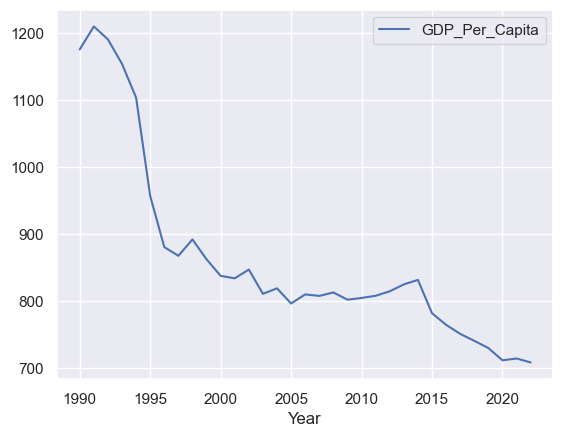

In [21]:
gdp_2020 = gdp_2020.sort_values("GDP_Per_Capita") #sort ascending
print(gdp_2020.iloc[:1]) #burundi

gdp_bur = gdp_df[gdp_df["Country"] == "Burundi"]
gdp_bur.plot(x="Year", y="GDP_Per_Capita")
plt.show()

**Bonus question:** 
Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
Which countries had lower GDP per capita in 2020 than in 1990?

Answer: No, the gdp was 12506 in 1990 vs 19586 in 2020.

In [22]:
#Part 1: Is it true in general that countries had a higher GDP per capita in 2020 than in 1990?
gdp_1990 = gdp_df[gdp_df["Year"]==1990]
mean_1990 = gdp_1990["GDP_Per_Capita"].mean()
mean_2020 = gdp_2020["GDP_Per_Capita"].mean()
print(mean_1990)
print(mean_2020)
print(mean_1990 > mean_2020) # calculate the average of each year 

12506.08837386169
19586.754445561965
False


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [23]:
#internet_df = pd.read_csv('../data/internet_use.csv')
#ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6
#opened file in visual studio and determined that the data ends at row 4495
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
print(internet_df.head())
print(internet_df.tail())
print(internet_df.info())

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [24]:
internet_df = internet_df.rename(columns={"Country or Area":"Country", "Value":"Internet_Users_Pct"})
internet_df = internet_df.drop("Value Footnotes", axis=1)
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


16. Look at the number of observations in this dataset per year. What do you notice?


Observations do not really begin until 1990 and are inconsistent until about 1995.


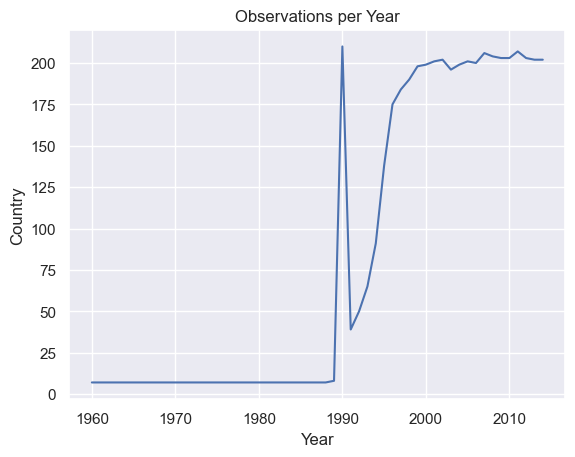

In [25]:
observations = internet_df.groupby("Year")["Country"].count()
#print(observations)
sns.lineplot(data=observations)
plt.title("Observations per Year")
print("Observations do not really begin until 1990 and are inconsistent until about 1995.")

17. What is the first year to have a non-zero internet users percentage value?

In [26]:
non_zero = internet_df.groupby("Year")["Internet_Users_Pct"].sum()
non_zero = pd.DataFrame(non_zero) 
non_zero = non_zero[non_zero["Internet_Users_Pct"]>0]
print(non_zero.iloc[:1])

      Internet_Users_Pct
Year                    
1990            5.032933


18. How does the distribution of internet users percent differ for 2000 and 2014?

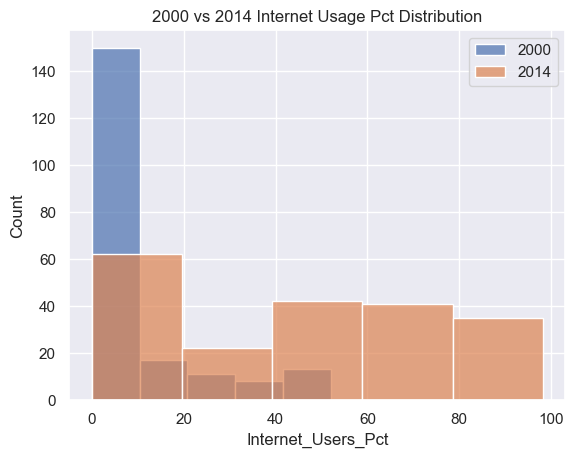

Internet usage increases greatly between 2000 and 2014. The distribution of internet usage is much greater in 2014.


In [27]:
d_2000 = internet_df[internet_df["Year"]==2000]
d_2014 = internet_df[internet_df["Year"]==2014]

sns.histplot(d_2000["Internet_Users_Pct"], bins=5, label='2000', alpha=0.7)
sns.histplot(d_2014["Internet_Users_Pct"], bins=5, label='2014', alpha=0.7)

plt.title("2000 vs 2014 Internet Usage Pct Distribution")
plt.legend()
plt.show()

print("Internet usage increases greatly between 2000 and 2014. The distribution of internet usage is much greater in 2014.")

19. For how many countries was the percentage of internet users below 5% in 2014?

Answer: 16 Countries

In [28]:
year_2014 = internet_df[internet_df["Year"] == 2014]
below_5 = year_2014[year_2014["Internet_Users_Pct"] < 5]
print(len(below_5))
print(below_5.sort_values("Internet_Users_Pct", ascending=False))

16
                                 Country  Year  Internet_Users_Pct
3956                            Tanzania  2014                4.86
762                 Central African Rep.  2014                4.03
2453                          Madagascar  2014                3.70
1742                       Guinea-Bissau  2014                3.32
909   Congo (Democratic Republic of the)  2014                3.00
1299                            Ethiopia  2014                2.90
782                                 Chad  2014                2.50
2814                             Myanmar  2014                2.10
3533                        Sierra Leone  2014                2.10
2975                               Niger  2014                1.95
1720                              Guinea  2014                1.72
3648                             Somalia  2014                1.63
623                              Burundi  2014                1.38
4019                         Timor-Leste  2014             

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [29]:
# print(internet_df.shape)
# print(gdp_df.shape) # should end up with 7662 rows

#outer join on Country & Year
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=("Country","Year"), how="outer")

#Review
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())
print(gdp_and_internet_use.shape)

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2021     1517.016266                 NaN
1  Afghanistan  2020     1968.341002                 NaN
2  Afghanistan  2019     2079.921861                 NaN
3  Afghanistan  2018     2060.698973                 NaN
4  Afghanistan  2017     2096.093111                 NaN
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8731   Yemen  1999             NaN            0.056629
8732   Yemen  1998             NaN            0.023323
8733   Yemen  1997             NaN            0.015025
8734   Yemen  1996             NaN            0.000621
8735   Yemen  1990             NaN            0.000000
(8736, 4)


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

Answer: Iceland has a significantly lower GDP, but the highest internet user %. 

In [30]:
top_3 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014].sort_values("Internet_Users_Pct", ascending=False).iloc[0:3]
print(top_3)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993  Iceland  2014    50450.741612               98.16
687   Bermuda  2014    77361.104881               96.80
5212   Norway  2014    62838.515727               96.30


C:\Users\Max-X1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


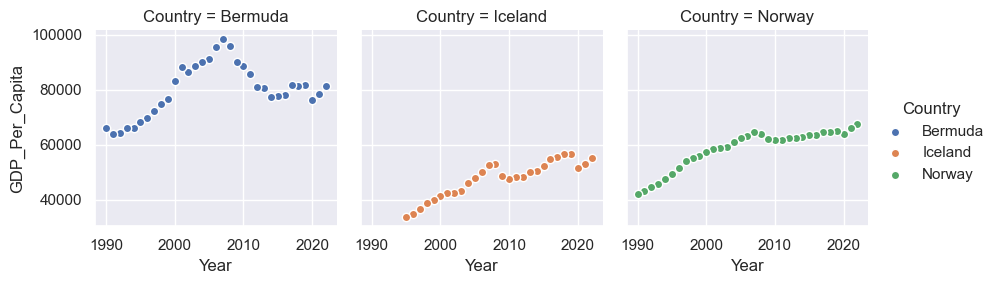

In [31]:
top_3_all = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Bermuda", "Norway"])]

graph = sns.FacetGrid(top_3_all, col="Country", hue ="Country") 

graph.map(plt.scatter, "Year", "GDP_Per_Capita", edgecolor ="w").add_legend()

plt.show() 


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [32]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
7                    Afghanistan  2014     2144.449634                6.39
28   Africa Eastern and Southern  2014     3642.875373                 NaN
61    Africa Western and Central  2014     4146.994622                 NaN
94                       Albania  2014    11586.817446               60.10
127                      Algeria  2014    11561.259795               18.09


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

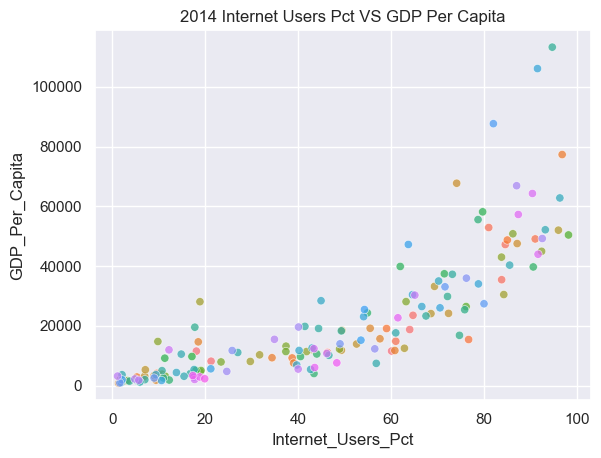

There are missing data points due to unrecorded data for either GDP or Internet Usage in countries such as China, 


In [33]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Country", legend=False, alpha=0.75)
plt.title("2014 Internet Users Pct VS GDP Per Capita")
plt.show()

print("There are missing data points due to unrecorded data for either GDP or Internet Usage in countries such as China, ")

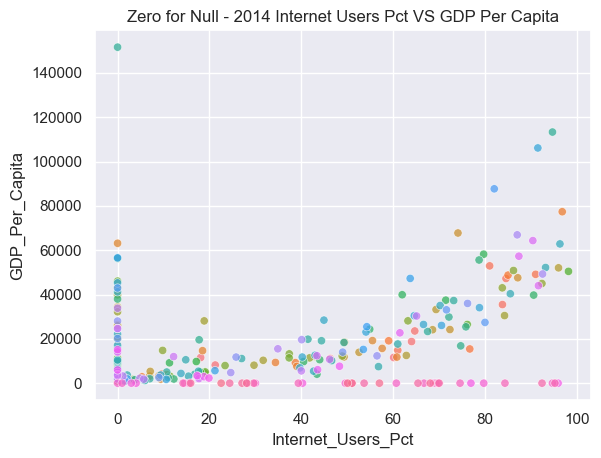

In [34]:
#INVESTIGATION WORK
#filling with 0 for nans

recorded = pd.DataFrame(gdp_and_internet_use_2014)
recorded = gdp_and_internet_use_2014.fillna(0)

#visualizing
sns.scatterplot(data=recorded, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Country", legend=False, alpha=0.75)
plt.title("Zero for Null - 2014 Internet Users Pct VS GDP Per Capita")
plt.show()

In [35]:
#INVESTIGATION WORK
print(recorded.sort_values("Internet_Users_Pct").head(20))
print(recorded.sort_values("GDP_Per_Capita").head(20))

                                            Country  Year  GDP_Per_Capita  \
2268                                 European Union  2014    39882.193276   
5653                      Post-demographic dividend  2014    45259.487701   
2960                                      IBRD only  2014    11257.666315   
5686                       Pre-demographic dividend  2014     3534.289649   
2895                           Hong Kong SAR, China  2014    56358.049095   
2829                                    High income  2014    46039.408807   
2796         Heavily indebted poor countries (HIPC)  2014     2373.100996   
5874                        SÃ£o TomÃ© and Principe  2014     3687.440493   
5928                                     San Marino  2014    56558.871855   
6147                      Sint Maarten (Dutch part)  2014    42946.685199   
2367       Fragile and conflict affected situations  2014     4563.187603   
6220                                   Small states  2014    20165.012343   

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [36]:
gdp_and_internet_use_2014["GDP_Group"] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3 , labels= ['Low', 'Medium', 'High'])

gdp_and_internet_use_2014.head()

C:\Users\Max-X1\AppData\Local\Temp\ipykernel_9376\4143688702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["GDP_Group"] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3 , labels= ['Low', 'Medium', 'High'])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium


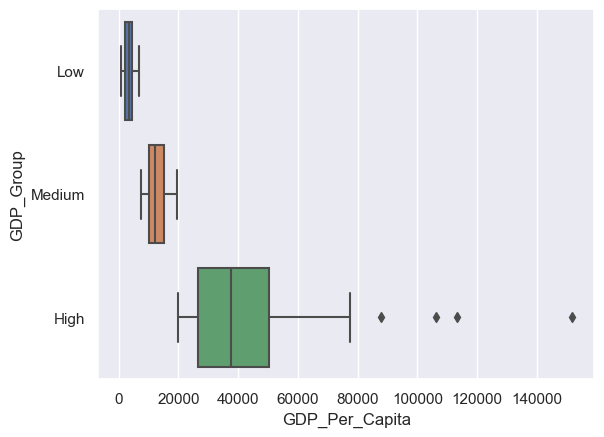

In [37]:
sns.boxplot(data=gdp_and_internet_use_2014, x="GDP_Per_Capita", y="GDP_Group")
plt.show()

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

Answer: Internet users increase as GDP gets higher. 

In [38]:
median_internet = gdp_and_internet_use_2014.groupby("GDP_Group")["Internet_Users_Pct"].median()
print(median_internet)

GDP_Group
Low       10.6
Medium    43.4
High      78.7
Name: Internet_Users_Pct, dtype: float64


bonus:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [39]:
#cleaning data
edu_df = pd.read_csv('../data/education_attendance.csv')
edu_df = edu_df.drop("Value Footnotes", axis=1) #didn't need footnotes
edu_df = edu_df.drop("Source", axis=1) #didn't need source info
edu_df = edu_df.rename(columns={"Country or Area":"Country", "Value":"Attendance_Perc"})
edu_df.reset_index()
edu_df = edu_df[edu_df["Subgroup"]=="Total"] #filtered out only total
edu_df = edu_df.drop("Subgroup", axis=1) #removed subgroup column
edu_df = edu_df.drop("Unit", axis=1) #removed unit column
print(edu_df.head())
print(edu_df.tail())
print(edu_df.shape)

        Country       Year  Attendance_Perc
0   Afghanistan  2005-2011              1.0
5       Albania  2005-2011             40.0
10   Bangladesh  2005-2011             15.0
15      Belarus  2005-2011             86.0
18       Belize  2005-2011             32.0
                        Country       Year  Attendance_Perc
249                     Ukraine  2005-2011             63.0
254                  Uzbekistan  2005-2011             20.0
259                    Viet Nam  2005-2011             72.0
264  Western and Central Africa  2005-2011             22.0
269                       Yemen  2005-2011              3.0
(58, 3)


In [52]:
#merging data
edu_plus_internet_gdp = pd.merge(gdp_and_internet_use, edu_df, on=("Country"), how="outer")
print(edu_plus_internet_gdp.head(20))
print(edu_plus_internet_gdp.info())

        Country  Year_x  GDP_Per_Capita  Internet_Users_Pct     Year_y  \
0   Afghanistan  2021.0     1517.016266                 NaN  2005-2011   
1   Afghanistan  2020.0     1968.341002                 NaN  2005-2011   
2   Afghanistan  2019.0     2079.921861                 NaN  2005-2011   
3   Afghanistan  2018.0     2060.698973                 NaN  2005-2011   
4   Afghanistan  2017.0     2096.093111                 NaN  2005-2011   
5   Afghanistan  2016.0     2101.422187                 NaN  2005-2011   
6   Afghanistan  2015.0     2108.714173                 NaN  2005-2011   
7   Afghanistan  2014.0     2144.449634            6.390000  2005-2011   
8   Afghanistan  2013.0     2165.340915            5.900000  2005-2011   
9   Afghanistan  2012.0     2122.830759            5.454545  2005-2011   
10  Afghanistan  2011.0     1961.096317            5.000000  2005-2011   
11  Afghanistan  2010.0     2026.163818            4.000000  2005-2011   
12  Afghanistan  2009.0     1823.74261